In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
import matplotlib.font_manager

In [2]:
fontName = 'YS Text'
fontColor = '#FF6427'
fontColor2 = '#000000'

font_files = matplotlib.font_manager.findSystemFonts(fontpaths='/usr/share/fonts/truetype')
for font_file in font_files:
    try: 
        matplotlib.font_manager.fontManager.addfont(font_file)
    except Exception:
        print('failed to add font ' + font_file)
        #ignore
font = {'family' : 'YS Text',
        'size'   : 16}

matplotlib.rc('font', **font)

failed to add font /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf


In [3]:
def plotComparison(ping, caption, rps):
    cps_no_locks = pd.read_csv(f'cps_false+ping_{ping}_rps_{rps}.csv', header=0, names=['time', 'rps'])
    cps_with_locks = pd.read_csv(f'cps_true+ping_{ping}_rps_{rps}.csv', header=0, names=['time', 'rps'])

    conn_no_locks = pd.read_csv(f'connections_false+ping_{ping}_rps_{rps}.csv', header=0, names=['time', 'conn'])
    conn_with_locks = pd.read_csv(f'connections_true+ping_{ping}_rps_{rps}.csv', header=0, names=['time', 'conn'])

    mean_val_cps_no_locks = mean(cps_no_locks['rps'])
    mean_val_cps_with_locks = mean(cps_with_locks['rps'])
    
    mean_val_conn_no_locks = mean(conn_no_locks['conn'])
    mean_val_conn_with_locks = mean(conn_with_locks['conn'])
    
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(111)
    ax.set_title(caption, fontsize=36, fontname=fontName)
    ax.set_xlabel('Time, millis', fontsize=22, fontname=fontName)
    ax.set_ylabel('RPS', fontsize=22, fontname=fontName)
    plt.scatter(x=cps_no_locks['time'], y=cps_no_locks['rps'], color=fontColor, label='No Locks. Mean: ' + f'{mean_val_cps_no_locks:.3f}')
    plt.axhline(y = mean_val_cps_no_locks, color = fontColor, linestyle = '-', linewidth=4)
    
    plt.scatter(x=cps_with_locks['time'], y=cps_with_locks['rps'], color=fontColor2, label='With Locks. Mean: ' + f'{mean_val_cps_with_locks:.3f}')
    plt.axhline(y = mean_val_cps_with_locks, color = fontColor2, linestyle = '-', linewidth=4)
    
    ax.grid()
    plt.legend(fontsize=22, loc ="upper right")
    plt.show()

    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(111)
    ax.set_title(caption, fontsize=36, fontname=fontName)
    ax.set_xlabel('Time, millis', fontsize=22, fontname=fontName)
    ax.set_ylabel('PG Connections', fontsize=22, fontname=fontName)
    plt.scatter(x=conn_no_locks['time'], y=conn_no_locks['conn'], color=fontColor, label='No Locks. Mean: ' + f'{mean_val_conn_no_locks:.3f}')
    plt.axhline(y = mean_val_conn_no_locks, color = fontColor, linestyle = '-', linewidth=4)
    
    plt.scatter(x=conn_with_locks['time'], y=conn_with_locks['conn'], color=fontColor2, label='With Locks. Mean: ' + f'{mean_val_conn_with_locks:.3f}')
    plt.axhline(y = mean_val_conn_with_locks, color = fontColor2, linestyle = '-', linewidth=4)
    
    ax.grid()
    plt.legend(fontsize=22, loc ="upper right")
    plt.show()

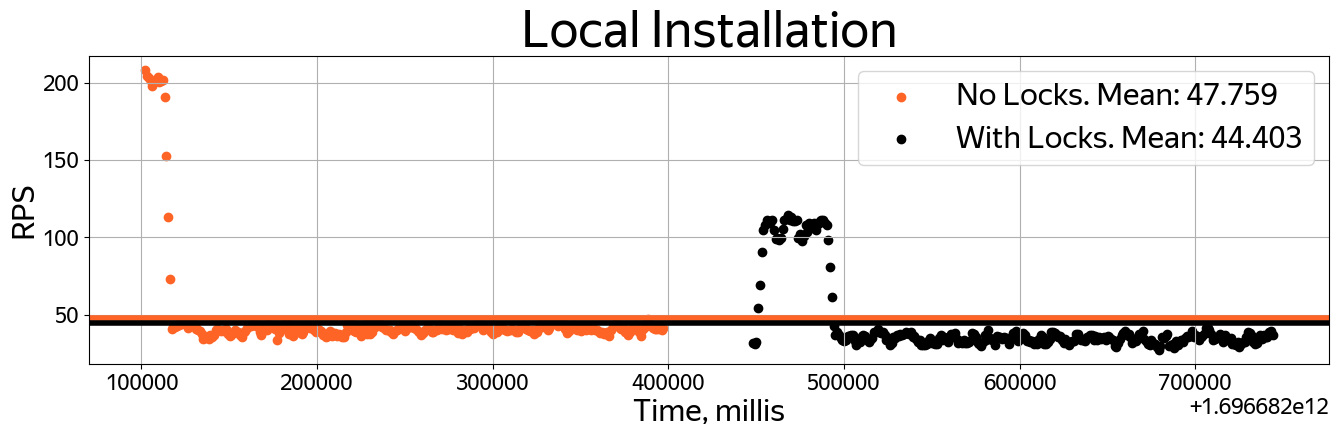

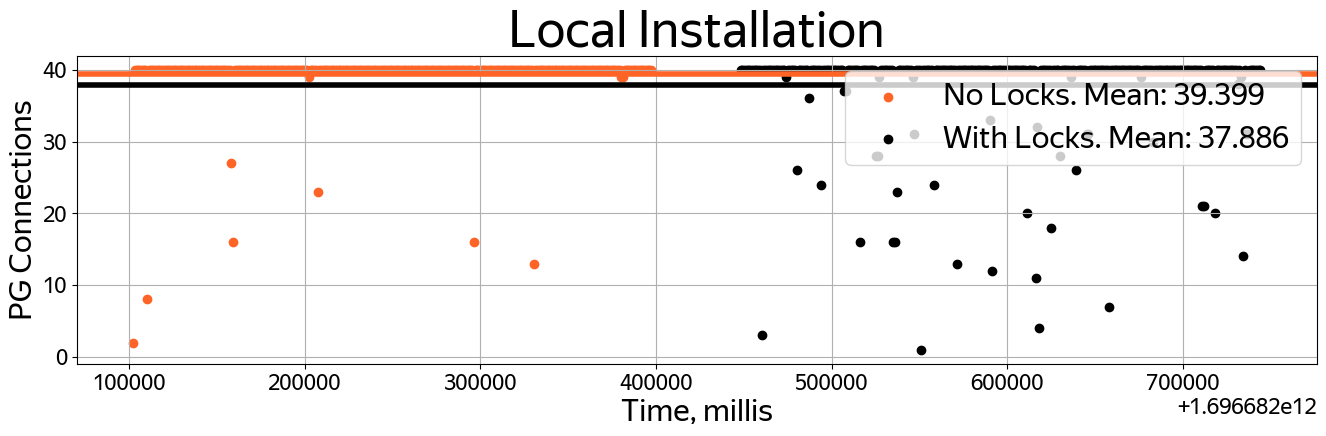

FileNotFoundError: [Errno 2] No such file or directory: 'cps_false+ping_1_rps_0.csv'

In [4]:
plotComparison('0', 'Local Installation', 0)
plotComparison('1', 'Ping: 1 ms', 0)
plotComparison('1', 'Ping: 1 ms, throttled', 10)
plotComparison('30', 'Ping: 30 ms', 0)

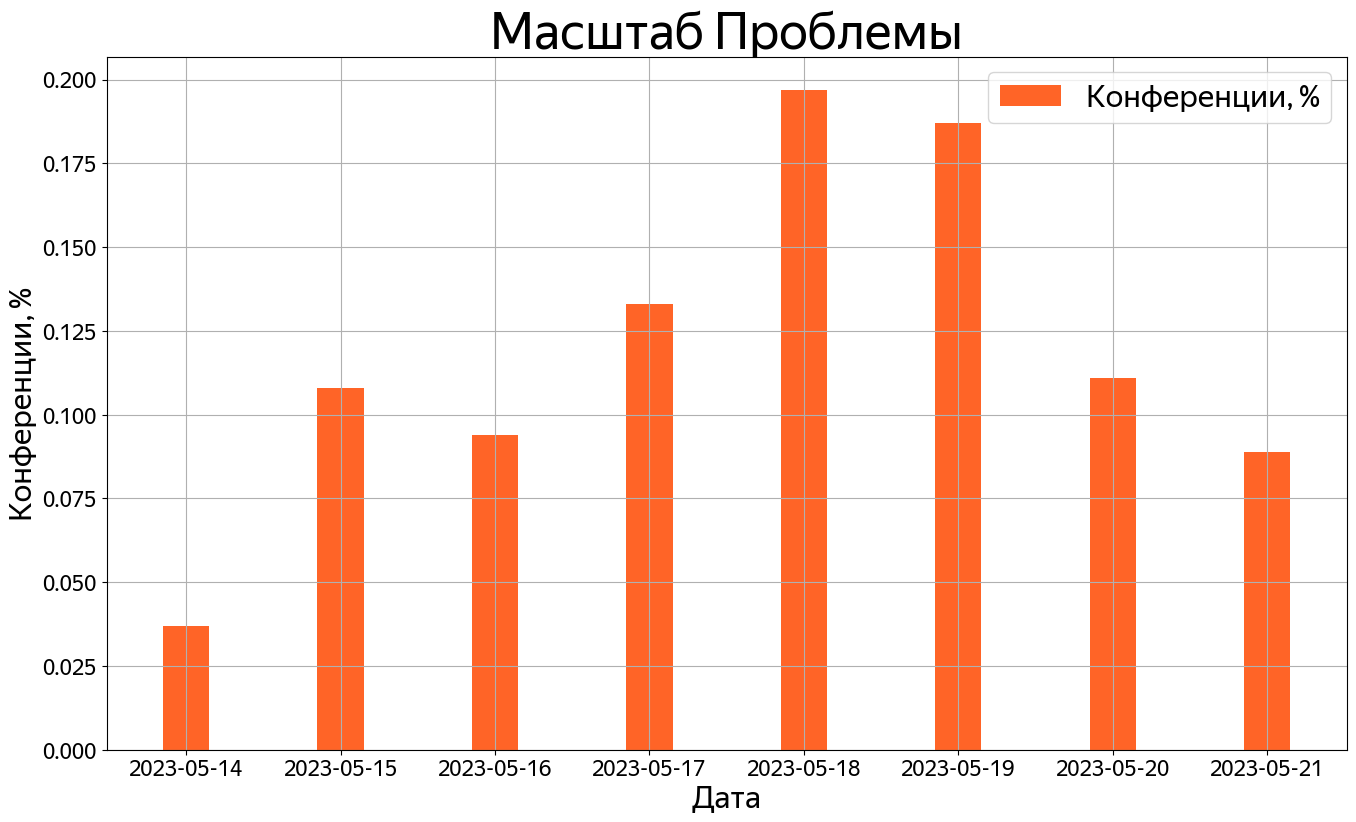

In [3]:
problem_scale = pd.read_csv('prepared/problem_scale.csv', header=0, names=['date', 'num_confs'])
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax.set_title('Масштаб Проблемы', fontsize=36, fontname=fontName)
ax.set_xlabel('Дата', fontsize=22, fontname=fontName)
ax.set_ylabel('Конференции, %', fontsize=22, fontname=fontName)
# ax.set_xticks(np.arange(0, 1.1, 0.1))
# ax.set_yticks(np.arange(0, 1.1, 0.1))
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# plt.scatter(x=problem_scale['date'], y=problem_scale['num_confs'], s=200, marker='s', color='brown', label='Количество конференций')
plt.bar(problem_scale['date'], problem_scale['num_confs'], label='Конференции, %', color=fontColor, width= 0.3)
ax.grid()
plt.legend(fontsize=22, loc ="upper right")
plt.show()

In [1]:
data_no_locks = pd.read_csv('prepared/real_setup_no_locks.csv', header=0, names=['time', 'rps'])
data_with_locks = pd.read_csv('prepared/real_setup_with_locks.csv', header=0, names=['time', 'rps'])

mean_val_no_locks = mean(data_no_locks['rps'])
mean_val_with_locks = mean(data_with_locks['rps'])

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax.set_title('В полной сборке', fontsize=36, fontname=fontName)
ax.set_xlabel('Time, sec', fontsize=22, fontname=fontName)
ax.set_ylabel('RPS', fontsize=22, fontname=fontName)
# ax.set_xticks(np.arange(0, 1.1, 0.1))
# ax.set_yticks(np.arange(0, 1.1, 0.1))
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
plt.scatter(x=data_no_locks['time'], y=data_no_locks['rps'], color=fontColor, label='Mean: ' + f'{mean_val_no_locks:.3f}')
plt.axhline(y = mean_val_no_locks, color = fontColor, linestyle = '-', linewidth=4)

plt.scatter(x=data_with_locks['time'], y=data_with_locks['rps'], color=fontColor2, label='Mean: ' + f'{mean_val_with_locks:.3f}')
plt.axhline(y = mean_val_with_locks, color = fontColor2, linestyle = '-', linewidth=4)

ax.grid()
plt.legend(fontsize=22, loc ="upper right")
plt.show()

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax.set_title('В полной сборке. С локами', fontsize=36, fontname=fontName)
ax.set_xlabel('Time, sec', fontsize=22, fontname=fontName)
ax.set_ylabel('RPS', fontsize=22, fontname=fontName)
# ax.set_xticks(np.arange(0, 1.1, 0.1))
# ax.set_yticks(np.arange(0, 1.1, 0.1))
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])

plt.scatter(x=data_with_locks['time'], y=data_with_locks['rps'], color=fontColor2, label='Mean: ' + f'{mean_val_with_locks:.3f}')
plt.axhline(y = mean_val_with_locks, color = fontColor2, linestyle = '-', linewidth=4)

ax.grid()
plt.legend(fontsize=22, loc ="upper right")
plt.show()

NameError: name 'pd' is not defined

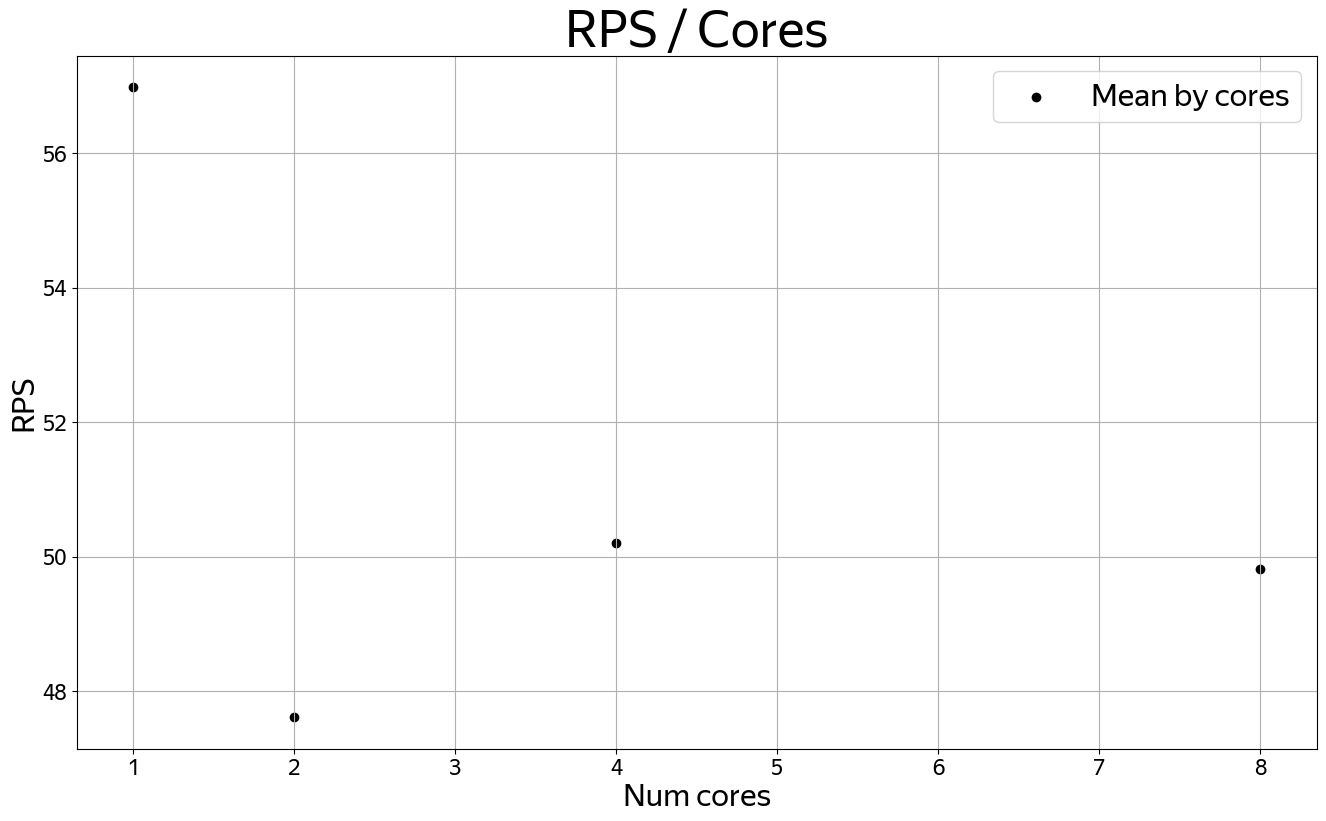

In [4]:
by_cores = [1,2,4,8]
data_rps_core = []
mean_by_cores = []

for i, cores in enumerate(by_cores):
    data_by_core = pd.read_csv(f'prepared/cores/{cores}/cps_false+ping_0_rps_0.csv', header=0, names=['time', 'rps'])
    mean_by_core = mean(data_by_core['rps'])
    
    data_rps_core.append(data_by_core)
    mean_by_cores.append(mean_by_core)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax.set_title('RPS / Cores', fontsize=36, fontname=fontName)
ax.set_xlabel('Num cores', fontsize=22, fontname=fontName)
ax.set_ylabel('RPS', fontsize=22, fontname=fontName)

plt.scatter(x=by_cores, y=mean_by_cores, color=fontColor2, label='Mean by cores')

ax.grid()
plt.legend(fontsize=22, loc ="upper right")
plt.show()